In [115]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [156]:
#Carga del csc a una fila
df= pd.read_csv('Data_Taller_1.csv',header=None,sep='\r\n')
df

C:\Users\oscar\AppData\Local\Temp\ipykernel_244956\2018394984.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df= pd.read_csv('Data_Taller_1.csv',header=None,sep='\r\n')


,0
0,"artist,song,duration_ms,explicit,year,populari..."
1,"Britney Spears,Oops!...I Did It Again,211160,F..."
2,"""blink-182,All The Small Things,167066,False,1..."
3,"""Faith Hill,Breathe,250546,False,1999,66,0.529..."
4,"""Bon Jovi,It's My Life,224493,False,2000,78,0...."
...,...
1996,"Jonas Brothers,Sucker,181026,False,2019,79,0.8..."
1997,"Taylor Swift,Cruel Summer,178426,False,2019,78..."
1998,"""Blanco Brown,The Git Up,200593,False,2019,69,..."
1999,"Sam Smith,Dancing With A Stranger (with Norman..."


In [157]:
#1. Describa el conjunto de datos, tipos de variables y destaque cualquier problema de calidad de datos y procesos de limpieza que deba implementar.

#Separacion por comas
df=df[0].str.split(',',expand=True)
df.rename(columns=df.iloc[0], inplace = True)

#Eliminacion los datos que no cumplen con el formato
df=df.drop([1817,1925,86,180,1061,76,770,235,483,1775,483,1775,211,1266,1119,1688,107,1883,1616,279,1619,848,630,1588,1241,1848,1976,947,773,341,795,1835,1583,1389,1509,651,676,1869,1691,872,655,1349,1950,1279,324,762,554,1831,526,1232])

df.rename({'genre;' :'genre'},axis=1,inplace=True)
df=df.drop(0)

#Conversion de columnas a tipo float, vacios = 0

df2=df.replace("",0)
df2['duration_ms']= df2['duration_ms'].replace({'':'0'}, regex=True)
df2['duration_ms']=df2['duration_ms'].astype(float)
df2['popularity']=df2['popularity'].astype(float)
df2['energy']=df2['energy'].astype(float)
df2['valence']=df2['valence'].astype(float)
df2['tempo']=df2['tempo'].astype(float)

df2['instrumentalness']=df2['instrumentalness'].astype(float)

#Eliminacion caracteres especiales
df2['genre']=df2['genre'].str.replace('"','')
df2['genre']=df2['genre'].str.replace(';','')


In [158]:
df.dtypes

artist              object
song                object
duration_ms         object
explicit            object
year                object
popularity          object
danceability        object
energy              object
key                 object
loudness            object
mode                object
speechiness         object
acousticness        object
instrumentalness    object
liveness            object
valence             object
tempo               object
genre               object
None                object
None                object
None                object
None                object
dtype: object

In [118]:
#1. ¿Cuál es el top 10 de artistas más activos de los últimos 10 años?

Activos=df2[(df['year']>'2012')]
Activos['artist'].value_counts().head(10)

"Drake               15
Ariana Grande        13
Taylor Swift         10
Selena Gomez          9
"Calvin Harris        9
Post Malone           9
"The Weeknd           8
"The Chainsmokers     8
Ed Sheeran            8
"Jason Derulo         7
Name: artist, dtype: int64

In [142]:
#2. ¿Cómo se diferencian las canciones de los géneros de Latin y Folk/Acoustic en relación con su duración? Halle la diferencia del tiempo promedio de ambos géneros.

Latin=df2[(df2['genre']=='latin')]
Folk_Acoustic=df2[(df2['genre']=='Folk/Acoustic')]

latin_mean=Latin['duration_ms'].mean()
Folk_Acoustic_mean=Folk_Acoustic['duration_ms'].mean()
print("La media de genero Folk/Acoustic es:")
print(Folk_Acoustic_mean)
print("La media de genero Latin es:")
print(latin_mean)
print("Diferencia:")
print(Folk_Acoustic_mean - latin_mean )

La media de genero Folk/Acoustic es:
250755.0
La media de genero latin es:
226330.73333333334
Diferencia
24424.266666666663


AxesSubplot(0.125,0.125;0.775x0.755)


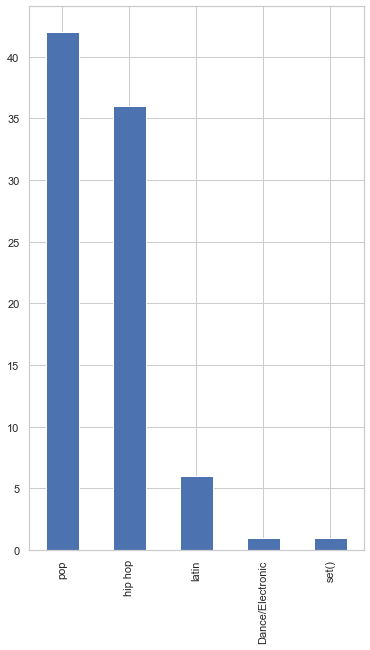

In [120]:
#3. Halle el top 5 de los géneros del 2019 según la cantidad de canciones. ¿Cómo ha variado la cantidad de canciones del Top de géneros en los años 2000, 2005, 2010, 2015, 2019?

generos_2019=df2[(df2['year']=='2019')]
generos_2015=df2[(df2['year']=='2015')]
generos_2010=df2[(df2['year']=='2010')]
generos_2005=df2[(df2['year']=='2005')]
generos_2000=df2[(df2['year']=='2000')]

print(generos_2019['genre'].value_counts().plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


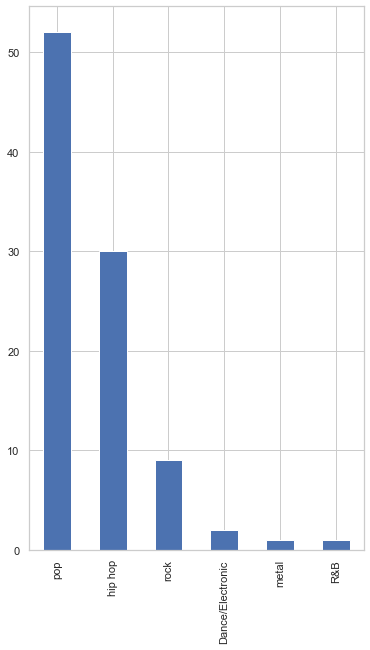

In [121]:
print(generos_2015['genre'].value_counts().plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


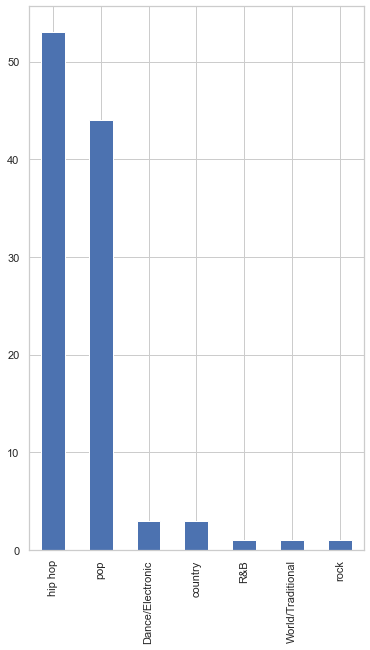

In [122]:
print(generos_2010['genre'].value_counts().plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


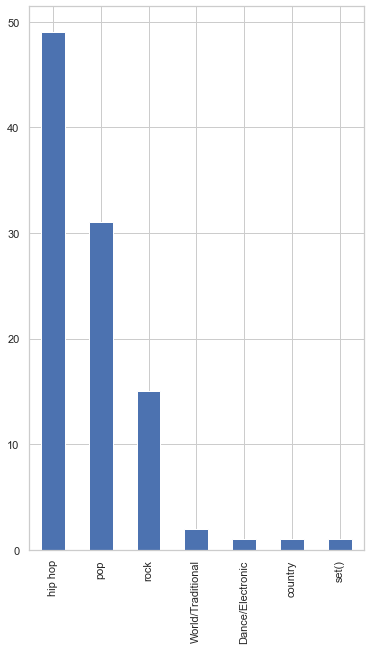

In [123]:
print(generos_2005['genre'].value_counts().plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


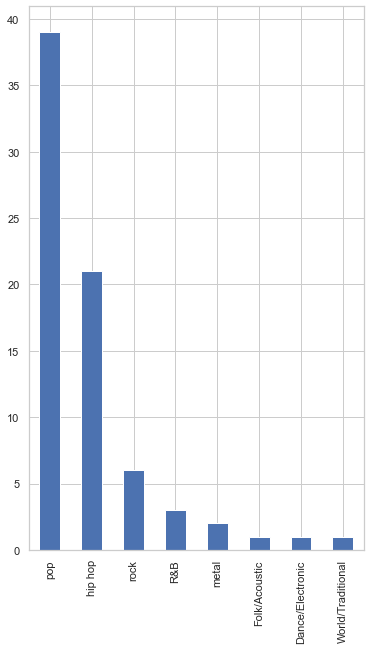

In [124]:
print(generos_2000['genre'].value_counts().plot(kind='bar'))

In [ ]:
#4. ¿Cómo ha sido la progresión de nuevos artistas? Asuma que un artista nuevo es aquel del cual no se tiene registros pasados y solo es nuevo durante el primer año de aparición.

144.46268980477222
120.73800976138838
108.96681127982653


In [126]:
#5. Grafique la progresión de la popularidad promedio por género y por año. Concluya sobre la gráfica, ej: ¿existen tendencias?
comparar=df2.groupby(['year','genre'])['popularity'].agg(['mean']).reset_index()

Genre = comparar.genre
Year = comparar.year
popularity = comparar.mean
comparar

,year,genre,mean
0,1998,hip hop,49.000000
1,1999,Dance/Electronic,56.000000
2,1999,hip hop,69.857143
3,1999,pop,61.818182
4,1999,rock,70.166667
...,...,...,...
129,2019,pop,58.547619
130,2019,set(),57.000000
131,2020,World/Traditional,57.000000
132,2020,hip hop,34.000000


<AxesSubplot:xlabel='mean', ylabel='genre'>

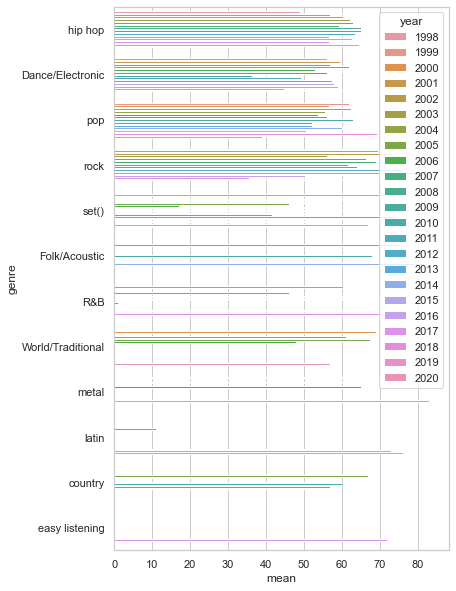

In [127]:
sns.set(rc={'figure.figsize':(6,10)})
sns.set_style("whitegrid")

sns.barplot(data=comparar, y="genre", x="mean", hue="year", orient="h") #oscar

In [ ]:
#6. Compare los géneros Pop y Rock según sus características de: energy, valence y tempo. Concluya sobre su análisis.
Pop =df2[(df2['genre']=='pop')]
Rock = df2[(df2['genre']=='rock')]

Pop_energy_mean=Pop['energy'].mean()
Pop_tempo_mean=Pop['tempo'].mean()
Rock_energy_mean=Rock['energy'].mean()
Rock_tempo_mean=Rock['tempo'].mean()
Pop_valence_mean=Pop['valence'].mean()
Rock_valence_mean=Rock['valence'].mean()

print(Pop_energy_mean*200)
print(Pop_tempo_mean)
print(Pop_valence_mean*200)

In [128]:
#7. Plantee una pregunta de negocio de su interés, ya sea por tipo de música, artistas u otra dimensión, mediante la cual se analicen al menos 3 variables del dataset y concluya.
Popularidad_2009=df2[(df2['year']>'2009')]

In [129]:
Popularidad_2009=Popularidad_2009[(Popularidad_2009['genre']=='rock')]

Popularidad_rock=Popularidad_2009.groupby(['year','genre'])['popularity'].agg(['mean']).reset_index()

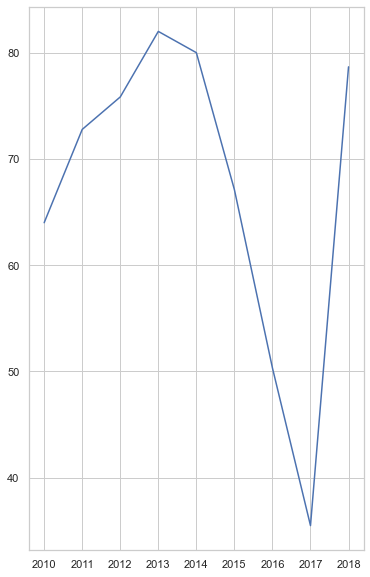

In [130]:
#Se puede observar que la popularidad por año de este genero en concreto es muy volatil por lo que sacar nuevas canciones es muy dificil ya que la recepcion del ublico es muy dificil de determinar

x=Popularidad_rock['year']
y=Popularidad_rock['mean']
plt.plot(x, y) 

plt.show() 
